# المرحلة التانية: المعالجة

# القيم المتطرفة: حذفها

## Necessary library loading 

In [1]:
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Initial phase, dataset load

## DataSet with Miss-data

In [2]:
BC= p.read_csv('bc_with_mis_90.csv')


In [3]:
BC

Sex  Age         Adress    FBS  Urea  Creatinin   ALB  T_Ca   GPT   GOT  \
0       1   60         Tragan  200.0  23.0        0.8   3.4   1.0   2.0   1.0   
1       1   53          Sabha  400.0  22.0        0.7   NaN   9.6   3.0   7.0   
2       1   50          Sabha  450.0  27.0        0.6   3.5   9.3  11.0  17.0   
3       1   36  Obaree-center  300.0  15.0        1.1   4.2   8.5  13.0   1.0   
4       1   30  Obaree-center  345.0   2.0        1.0   3.0   8.0   7.0  13.0   
...   ...  ...            ...    ...   ...        ...   ...   ...   ...   ...   
2432    1   30      Algatroon   70.0  28.0        0.7   5.9   9.5  63.0  23.0   
2433    1   47          Sabha   98.0  32.0        0.8  10.2   8.8  82.0  23.0   
2434    1   43          Sabha   76.0  15.0        0.6  11.4   8.1  22.0  15.0   
2435    1   60          Sabha  120.0  29.0        0.9  10.9   8.2  51.0  17.0   
2436    1   68          Sabha   90.0  29.0        0.6   5.3   8.5  83.0  20.0   

      ...  WBC   RBC   HGB    PLT   ESR    LDH     Na     K     CL  CLASS  
0     ...  3.4  4.60  13.4  500.0  25.0  150.0  145.0  4.50   19.1      0  
1     ...  4.4  5.00  12.5    NaN  15.0  260.0  137.8  4.18   19.1      0  
2     ...  5.1  4.46  12.5  456.0   2.0  169.0  139.2  4.17   16.4      0  
3     ...  3.1  4.33  13.8  600.0  15.0  138.0   14.0  4.00    1.1      0  
4     ...  4.2  4.13   1.7  543.0  25.0  154.0  136.4  4.60   17.1      0  
...   ...  ...   ...   ...    ...   ...    ...    ...   ...    ...    ...  
2432  ...  3.9  5.23  11.3  288.0  15.0  254.0  138.7  4.35  103.6      1  
2433  ...  4.8  4.57  13.2  249.0  12.0  254.0  142.3  4.40  102.7      1  
2434  ...  4.4  4.32  11.1  249.0   8.0  254.0  137.8  4.25  110.2      1  
2435  ...  4.5  4.41  12.9  293.0  13.0  254.0  147.5  3.15  107.5      1  
2436  ...  3.4  4.42  11.0  199.0  15.0  254.0  142.3  3.23  107.5      1  

[2437 rows x 23 columns]

## Dataset size

In [4]:
print(BC.shape)

(2437, 23)


In [5]:
BC.head()

Sex  Age         Adress    FBS  Urea  Creatinin  ALB  T_Ca   GPT   GOT  \
0    1   60         Tragan  200.0  23.0        0.8  3.4   1.0   2.0   1.0   
1    1   53          Sabha  400.0  22.0        0.7  NaN   9.6   3.0   7.0   
2    1   50          Sabha  450.0  27.0        0.6  3.5   9.3  11.0  17.0   
3    1   36  Obaree-center  300.0  15.0        1.1  4.2   8.5  13.0   1.0   
4    1   30  Obaree-center  345.0   2.0        1.0  3.0   8.0   7.0  13.0   

   ...  WBC   RBC   HGB    PLT   ESR    LDH     Na     K    CL  CLASS  
0  ...  3.4  4.60  13.4  500.0  25.0  150.0  145.0  4.50  19.1      0  
1  ...  4.4  5.00  12.5    NaN  15.0  260.0  137.8  4.18  19.1      0  
2  ...  5.1  4.46  12.5  456.0   2.0  169.0  139.2  4.17  16.4      0  
3  ...  3.1  4.33  13.8  600.0  15.0  138.0   14.0  4.00   1.1      0  
4  ...  4.2  4.13   1.7  543.0  25.0  154.0  136.4  4.60  17.1      0  

[5 rows x 23 columns]

In [6]:
BC.tail()

Sex  Age     Adress    FBS  Urea  Creatinin   ALB  T_Ca   GPT   GOT  \
2432    1   30  Algatroon   70.0  28.0        0.7   5.9   9.5  63.0  23.0   
2433    1   47      Sabha   98.0  32.0        0.8  10.2   8.8  82.0  23.0   
2434    1   43      Sabha   76.0  15.0        0.6  11.4   8.1  22.0  15.0   
2435    1   60      Sabha  120.0  29.0        0.9  10.9   8.2  51.0  17.0   
2436    1   68      Sabha   90.0  29.0        0.6   5.3   8.5  83.0  20.0   

      ...  WBC   RBC   HGB    PLT   ESR    LDH     Na     K     CL  CLASS  
2432  ...  3.9  5.23  11.3  288.0  15.0  254.0  138.7  4.35  103.6      1  
2433  ...  4.8  4.57  13.2  249.0  12.0  254.0  142.3  4.40  102.7      1  
2434  ...  4.4  4.32  11.1  249.0   8.0  254.0  137.8  4.25  110.2      1  
2435  ...  4.5  4.41  12.9  293.0  13.0  254.0  147.5  3.15  107.5      1  
2436  ...  3.4  4.42  11.0  199.0  15.0  254.0  142.3  3.23  107.5      1  

[5 rows x 23 columns]

## Info Data

In [7]:
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 23 columns):
Sex          2437 non-null int64
Age          2437 non-null int64
Adress       2437 non-null object
FBS          2048 non-null float64
Urea         2275 non-null float64
Creatinin    2282 non-null float64
ALB          2148 non-null float64
T_Ca         2142 non-null float64
GPT          2140 non-null float64
GOT          2202 non-null float64
ALP          2126 non-null float64
CA15         2435 non-null float64
CEA          2435 non-null float64
WBC          2333 non-null float64
RBC          2369 non-null float64
HGB          2337 non-null float64
PLT          2258 non-null float64
ESR          2049 non-null float64
LDH          2052 non-null float64
Na           2011 non-null float64
K            2039 non-null float64
CL           1775 non-null float64
CLASS        2437 non-null int64
dtypes: float64(19), int64(3), object(1)
memory usage: 438.0+ KB


In [8]:
BC['CLASS'] = BC['CLASS'].map({0:"Benine", 1:"Mealigent"})

In [9]:
BC.CLASS.value_counts()

Benine       1351
Mealigent    1086
Name: CLASS, dtype: int64

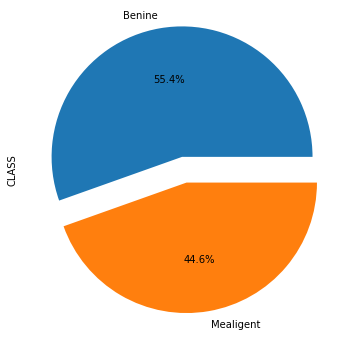

In [10]:
BC.CLASS.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',figsize=(8,6))

In [11]:
BC["CLASS"].value_counts(normalize=True)

Benine       0.55437
Mealigent    0.44563
Name: CLASS, dtype: float64

In [12]:
BC['Sex'] = BC['Sex'].map({1:"Femal", 2:"meal"})


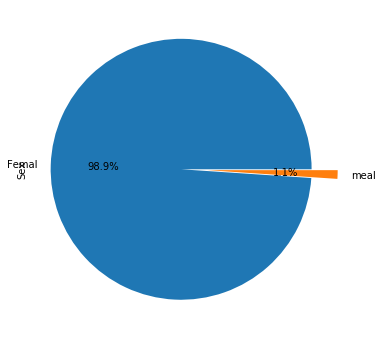

In [13]:
BC.Sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',figsize=(8,6))

In [14]:
BC["Sex"].value_counts(normalize=True)

Femal    0.989331
meal     0.010669
Name: Sex, dtype: float64

In [15]:
BC.Sex.value_counts()

Femal    2411
meal       26
Name: Sex, dtype: int64

## Statistics 

It shows the following measures separately for each feature:
- **count**: the number of non-null observations.
- **mean**: the mean of the values.
- **std**: the standard deviation of the values.
- **min**: the minimum of the values.
- **max**: the maximum of the values.
- **25%**: the lower percentile.
- **50%**: the median.
- **75%**: the upper percentile.

In [16]:
BC.describe().round(1).T

count   mean    std   min    25%    50%    75%     max
Age        2437.0   49.4   11.3  23.0   41.0   48.0   55.0    90.0
FBS        2048.0  160.7   84.0  11.0   99.0  145.0  200.0   764.0
Urea       2275.0   24.6   20.2   0.5   14.0   21.0   29.0   191.0
Creatinin  2282.0    1.1    1.3   0.1    0.7    0.8    1.0    39.0
ALB        2148.0    4.5    2.5   0.2    3.3    3.8    4.5    38.0
T_Ca       2142.0    8.0    5.5   0.4    7.9    8.5    9.3    99.6
GPT        2140.0   15.6   15.3   1.0    7.0   13.0   19.0   179.0
GOT        2202.0   17.2   14.6   1.0    9.0   15.0   22.0   164.0
ALP        2126.0  140.7   88.1   1.0   95.0  145.0  187.0   867.0
CA15       2435.0   31.0   20.3   0.3   12.8   23.1   50.0   100.0
CEA        2435.0    4.5    3.4   0.0    1.5    3.1    8.1    20.8
WBC        2333.0    7.3    4.6   0.3    4.4    6.3    8.9    88.3
RBC        2369.0    6.5   17.2   0.7    4.1    4.4    5.2   492.0
HGB        2337.0   11.0    6.8   0.3   11.0   12.1   13.0   224.0
PLT        2258.0  283.6  140.8   1.0  197.0  282.0  401.0   947.0
ESR        2049.0   25.4   25.7   1.0   10.0   19.0   34.0   333.0
LDH        2052.0  185.2  100.0   1.0  138.0  185.0  254.0   934.0
Na         2011.0  130.0   48.5   4.1  136.5  139.2  143.0  1377.0
K          2039.0    5.6   22.8   0.4    3.8    4.2    4.5   423.0
CL         1775.0   42.1   42.6   1.0   16.3   18.3  101.3   184.0

In [17]:
BC.describe(include=["object", "bool"]).T

count unique     top  freq
Sex     2437      2   Femal  2411
Adress  2437     30   Sabha  1264
CLASS   2437      2  Benine  1351

In [18]:
BC['CLASS'] = BC['CLASS'].map({"Benine":0,"Mealigent":1})
BC['Sex'] = BC['Sex'].map({"Femal":1,"meal":2})



In [19]:
BC["Adress"].unique()

array(['Tragan', 'Sabha', 'Obaree-center', 'Alchate', 'Morzek',
       'Alzeegan', 'Algatroon', 'Godoha', 'Zoiwela', 'OmAlrianb',
       'Tripoli', 'Wade-atebah', 'Temaciha', 'Algofra', 'Gath',
       'Benwalid', 'Temcian', 'Alzwia-Algrbia', 'Magdool', 'BenGawoad',
       'Alagialt', 'Agdabia', 'GaberOan', 'Subrath', 'ALzentan',
       'Benghazi', 'Tegee', 'Graian', 'Zwoarha', 'sabha'], dtype=object)

In [20]:
BC["Adress"].value_counts()

Sabha             1264
Alchate            399
Obaree-center      213
Morzek             100
Algatroon           77
Tragan              64
Wade-atebah         56
OmAlrianb           39
Algofra             32
Tripoli             32
Zoiwela             29
Magdool             28
Gath                19
Godoha              16
Benwalid            15
Temcian             11
Alzeegan            10
Temaciha            10
Alzwia-Algrbia       5
Alagialt             4
Tegee                4
BenGawoad            2
Subrath              1
ALzentan             1
GaberOan             1
Agdabia              1
Graian               1
sabha                1
Benghazi             1
Zwoarha              1
Name: Adress, dtype: int64

In [21]:
BC["Adress"].value_counts(normalize=True)

Sabha             0.518670
Alchate           0.163726
Obaree-center     0.087403
Morzek            0.041034
Algatroon         0.031596
Tragan            0.026262
Wade-atebah       0.022979
OmAlrianb         0.016003
Algofra           0.013131
Tripoli           0.013131
Zoiwela           0.011900
Magdool           0.011490
Gath              0.007796
Godoha            0.006565
Benwalid          0.006155
Temcian           0.004514
Alzeegan          0.004103
Temaciha          0.004103
Alzwia-Algrbia    0.002052
Alagialt          0.001641
Tegee             0.001641
BenGawoad         0.000821
Subrath           0.000410
ALzentan          0.000410
GaberOan          0.000410
Agdabia           0.000410
Graian            0.000410
sabha             0.000410
Benghazi          0.000410
Zwoarha           0.000410
Name: Adress, dtype: float64

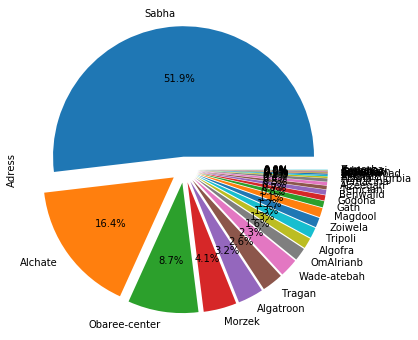

In [22]:
BC.Adress.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',figsize=(8,6))

In [23]:
BC.isnull().sum()

Sex            0
Age            0
Adress         0
FBS          389
Urea         162
Creatinin    155
ALB          289
T_Ca         295
GPT          297
GOT          235
ALP          311
CA15           2
CEA            2
WBC          104
RBC           68
HGB          100
PLT          179
ESR          388
LDH          385
Na           426
K            398
CL           662
CLASS          0
dtype: int64

In [24]:
percentage_missing_FBS = (BC['FBS'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_FBS",percentage_missing_FBS)

percentage_missing_Urea = (BC['Urea'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_Urea",percentage_missing_Urea)

percentage_missing_Creatinin = (BC['Creatinin'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_Creatinin",percentage_missing_Creatinin)


percentage_missing_FBS 0.16
percentage_missing_Urea 0.07
percentage_missing_Creatinin 0.06


In [25]:
percentage_missing_ALB = (BC['ALB'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_ALB",percentage_missing_ALB)

percentage_missing_T_Ca = (BC['T_Ca'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_T_Ca",percentage_missing_T_Ca)

percentage_missing_GPT = (BC['GPT'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_GPT",percentage_missing_GPT)


percentage_missing_ALB 0.12
percentage_missing_T_Ca 0.12
percentage_missing_GPT 0.12


In [26]:
percentage_missing_GOT = (BC['GOT'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_GOT",percentage_missing_GOT)

percentage_missing_ALP = (BC['ALP'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_ALP",percentage_missing_ALP)

percentage_missing_CA15 = (BC['CA15'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_CA15",percentage_missing_CA15)


percentage_missing_GOT 0.1
percentage_missing_ALP 0.13
percentage_missing_CA15 0.0


In [27]:
percentage_missing_CEA = (BC['CEA'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_CEA",percentage_missing_CEA)

percentage_missing_WBC = (BC['WBC'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_WBC",percentage_missing_WBC)

percentage_missing_RBC = (BC['RBC'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_RBC",percentage_missing_RBC)


percentage_missing_CEA 0.0
percentage_missing_WBC 0.04
percentage_missing_RBC 0.03


In [28]:
percentage_missing_HGB = (BC['HGB'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_HGB",percentage_missing_HGB)

percentage_missing_PLT = (BC['PLT'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_PLT",percentage_missing_PLT)

percentage_missing_ESR = (BC['ESR'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_ESR",percentage_missing_ESR)


percentage_missing_HGB 0.04
percentage_missing_PLT 0.07
percentage_missing_ESR 0.16


In [29]:
percentage_missing_LDH = (BC['LDH'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_LDH",percentage_missing_LDH)

percentage_missing_Na = (BC['Na'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_Na",percentage_missing_Na)

percentage_missing_K = (BC['K'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_K",percentage_missing_K)

percentage_missing_CL = (BC['CL'].isnull().sum()/(len(BC) * 1.0)).round(2) 
print("percentage_missing_CL",percentage_missing_CL)



percentage_missing_LDH 0.16
percentage_missing_Na 0.17
percentage_missing_K 0.16
percentage_missing_CL 0.27


In [30]:

BC2 = BC[[column for column in BC if BC[column].count() / len(BC) <= 0.3]]

print("List of dropped columns:", end=" ")
for c in BC.columns:
    if c not in BC2.columns:
        print(c, end=", ")


List of dropped columns: Sex, Age, Adress, FBS, Urea, Creatinin, ALB, T_Ca, GPT, GOT, ALP, CA15, CEA, WBC, RBC, HGB, PLT, ESR, LDH, Na, K, CL, CLASS, 

In [31]:
duplicate_rows_BC = BC[BC.duplicated()]
print("number of duplicate rows: ", duplicate_rows_BC.shape)

number of duplicate rows:  (0, 23)


In [32]:
Q1 = BC.quantile(0.25)
Q3 = BC.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sex            0.0000
Age           14.0000
FBS          101.0000
Urea          15.0000
Creatinin      0.3000
ALB            1.2125
T_Ca           1.4000
GPT           12.0000
GOT           13.0000
ALP           92.0000
CA15          37.1650
CEA            6.5600
WBC            4.5000
RBC            1.0600
HGB            2.0000
PLT          204.0000
ESR           24.0000
LDH          116.0000
Na             6.5000
K              0.7000
CL            85.0000
CLASS          1.0000
dtype: float64


In [33]:
BC = BC[~((BC < (Q1 - 1.5 * IQR)) |(BC > (Q3 + 1.5 * IQR))).any(axis=1)]
BC.shape

(901, 23)

## Distributions values of all Features


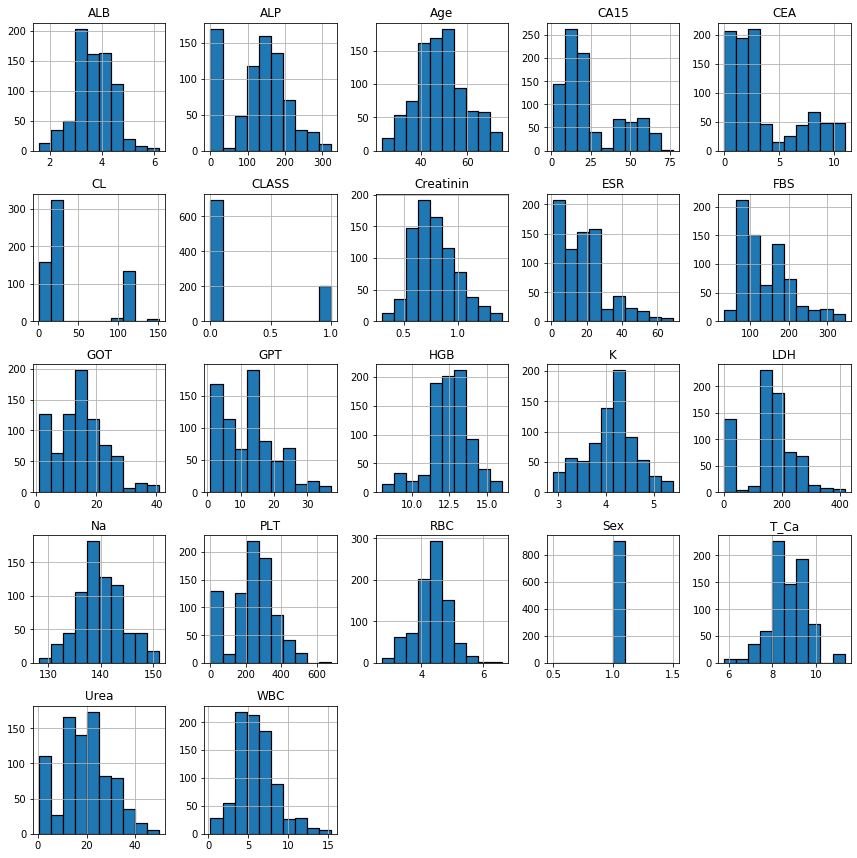

In [34]:
BC.hist(figsize=(12,12), edgecolor='black', linewidth=1.2)
plt.tight_layout( True )
plt.show()

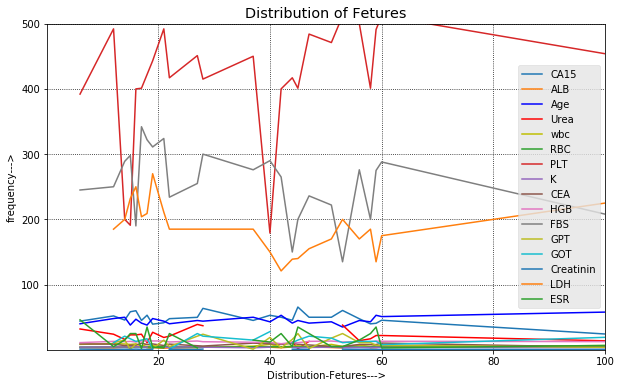

In [35]:
from matplotlib import rcParams
rcParams['figure.figsize']=10,6

plt.plot(BC.CA15,label='CA15')


plt.plot(BC.ALB,label='ALB')
plt.plot(BC.Age,'b-',label='Age')
plt.plot(BC.Urea,'r-',label='Urea')
plt.plot(BC.WBC,'y-',label='wbc')
plt.plot(BC.RBC,label='RBC')
plt.plot(BC.PLT,label='PLT')
plt.plot(BC.K,label='K')
plt.plot(BC.CEA,label='CEA')
plt.plot(BC.HGB,label='HGB')
plt.plot(BC.FBS,label='FBS')
plt.plot(BC.GPT,label='GPT')
plt.plot(BC.GOT,label='GOT')
plt.plot(BC.Creatinin,label='Creatinin')
plt.plot(BC.LDH,label='LDH')
plt.plot(BC.ESR,label='ESR')


plt.grid(True, color='k', linestyle=':')
plt.xlim(0.1,100)
plt.ylim(0.1,500)
plt.style.use('ggplot')

plt.title("Distribution of Fetures")
plt.xlabel('Distribution-Fetures--->')
plt.ylabel('frequency--->')

plt.legend()

#plt.legend(loc='bst')
#plt.legend(bbox_to_anchor=(1,1),fontsize=8)

plt.show()


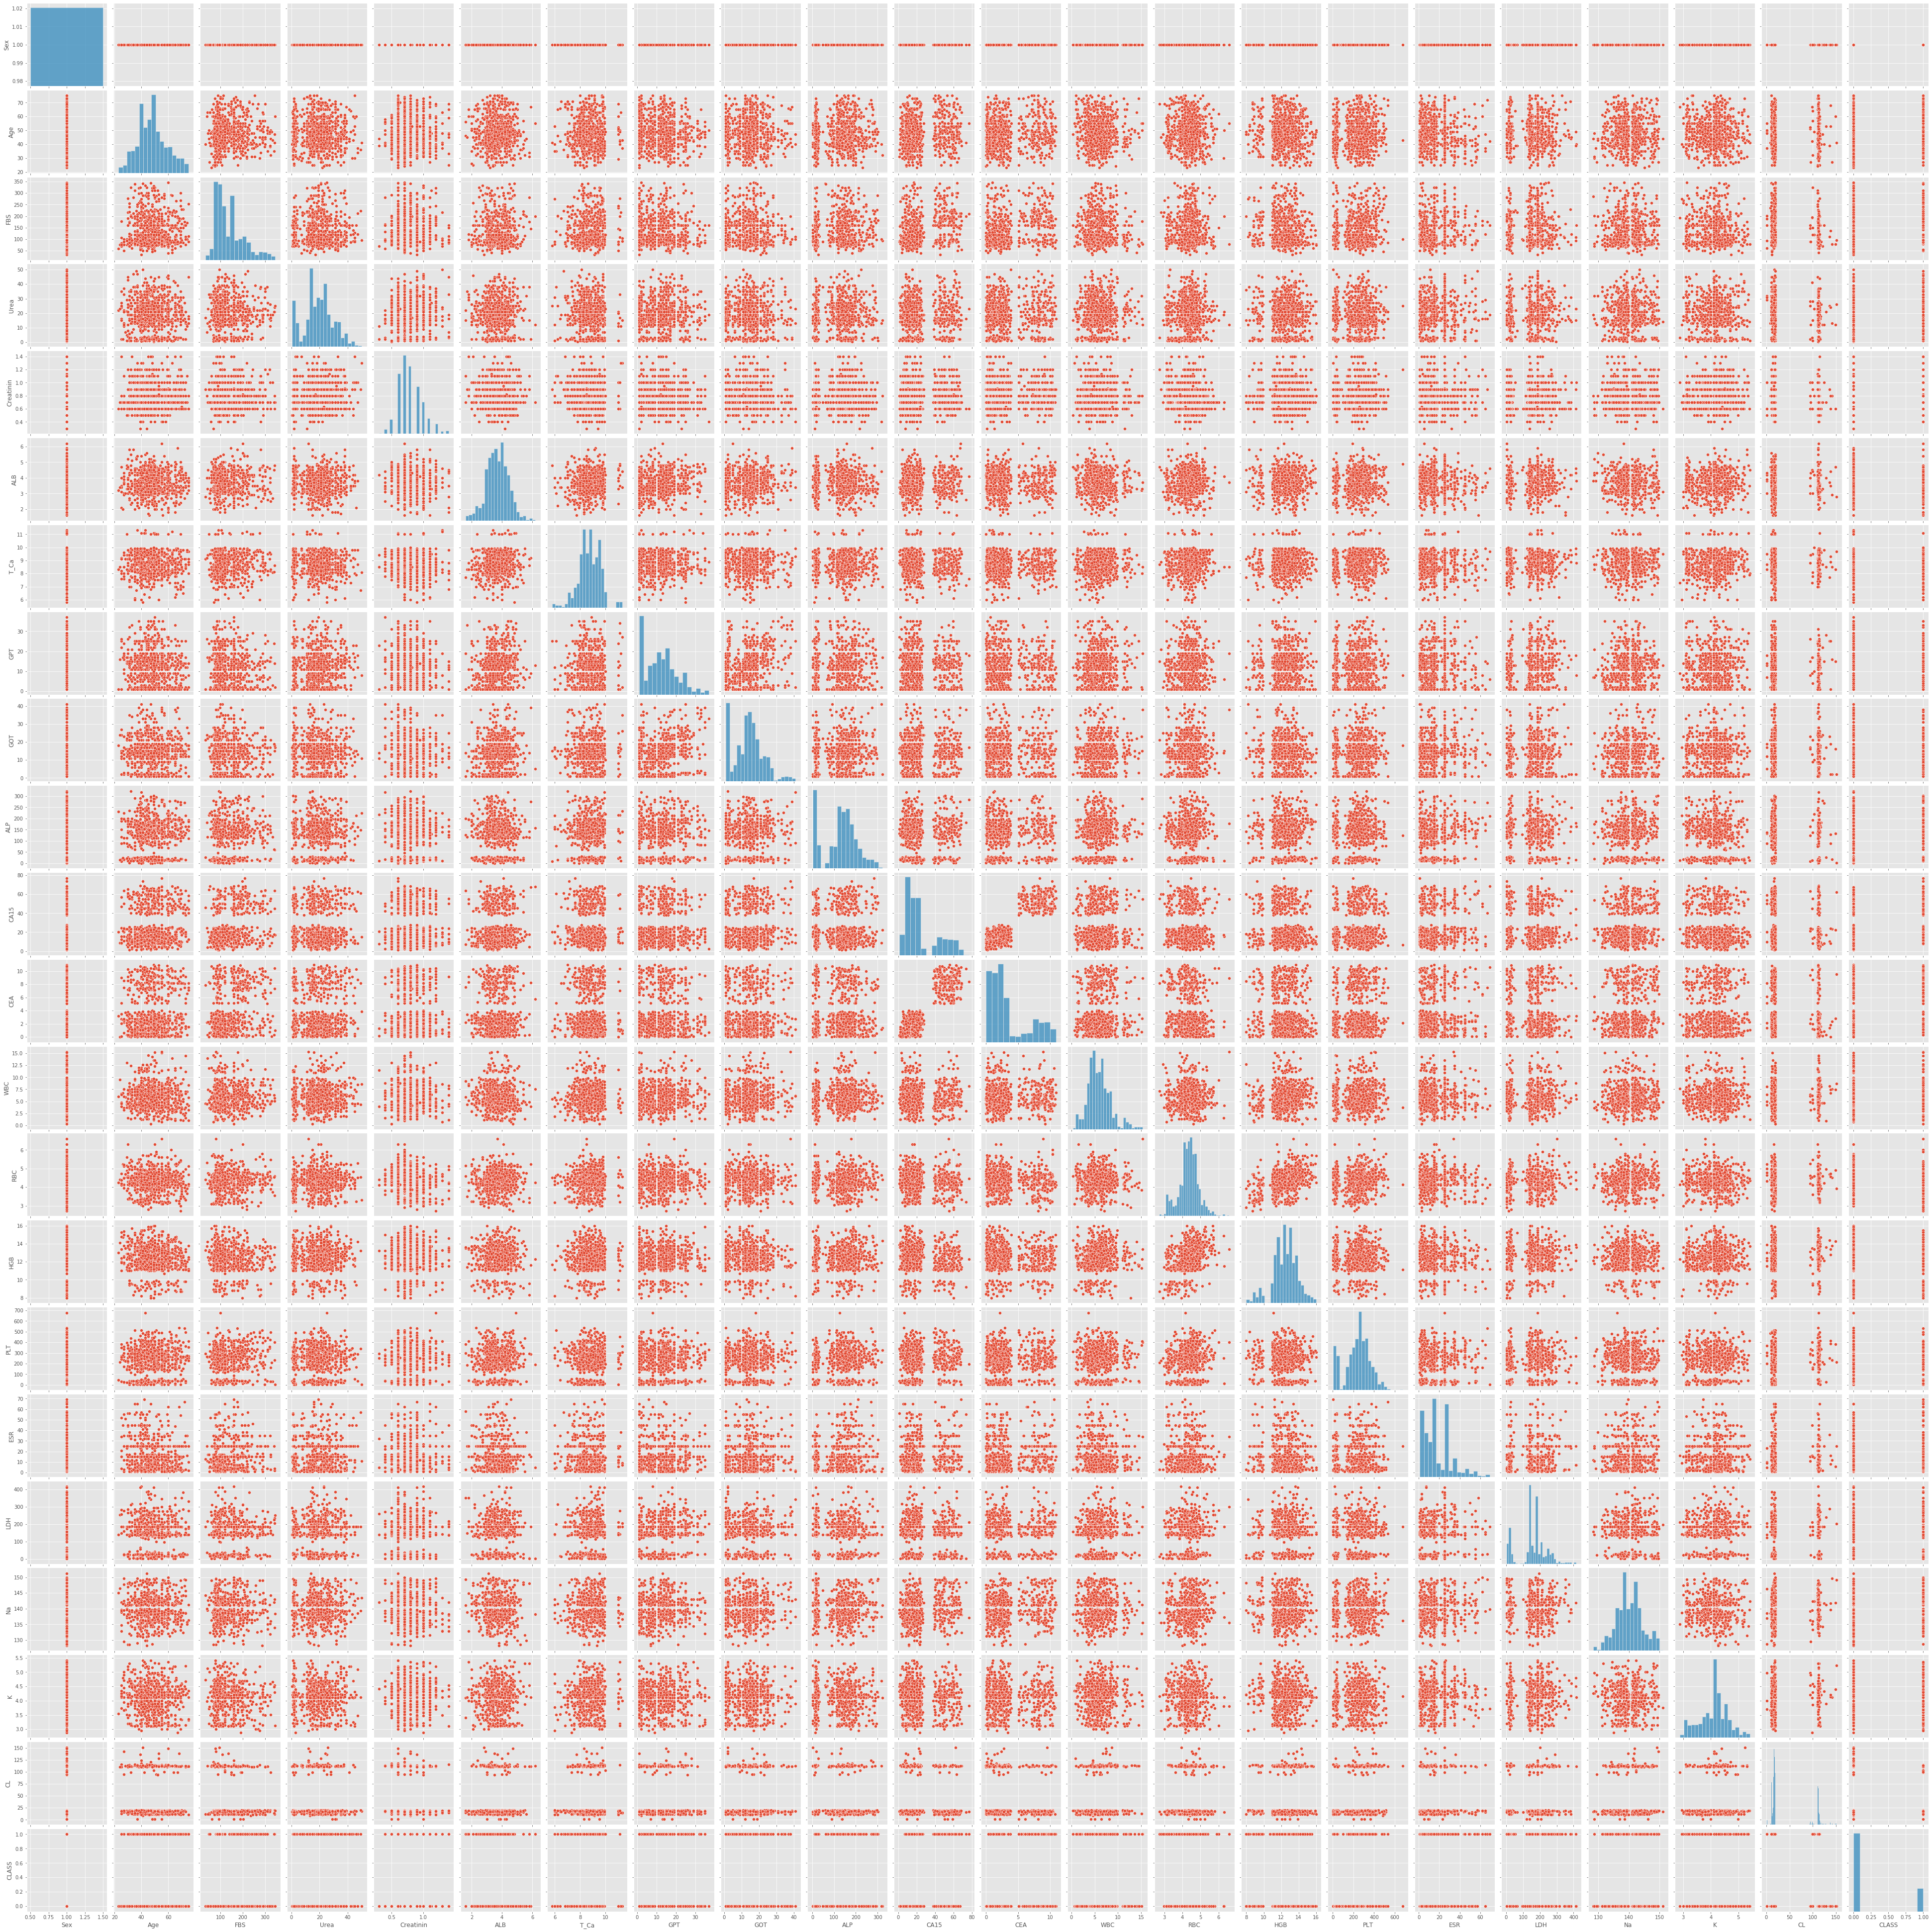

In [36]:
sns.pairplot(BC)

## Missing value investigation 


In [37]:
BC.isnull().sum()

Sex            0
Age            0
Adress         0
FBS          167
Urea          68
Creatinin     77
ALB          134
T_Ca         137
GPT          126
GOT          101
ALP          137
CA15           0
CEA            0
WBC           38
RBC           35
HGB           52
PLT           74
ESR          143
LDH          156
Na           184
K            149
CL           264
CLASS          0
dtype: int64

## Correlation Analysis

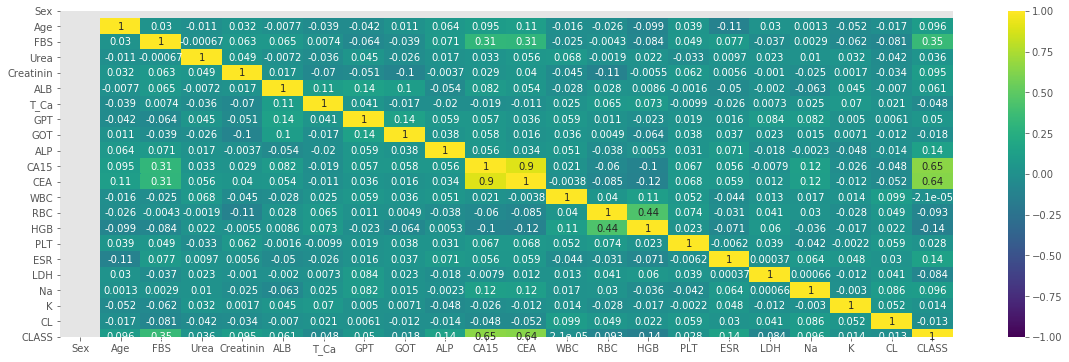

In [38]:
plt.figure(figsize=(20,6))
sns.heatmap(BC.corr(),annot=True,center=0, cmap='viridis',vmin=-1,
    vmax=1)

In [39]:
mask=np.zeros_like(BC.corr())
triangle_indices= np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,

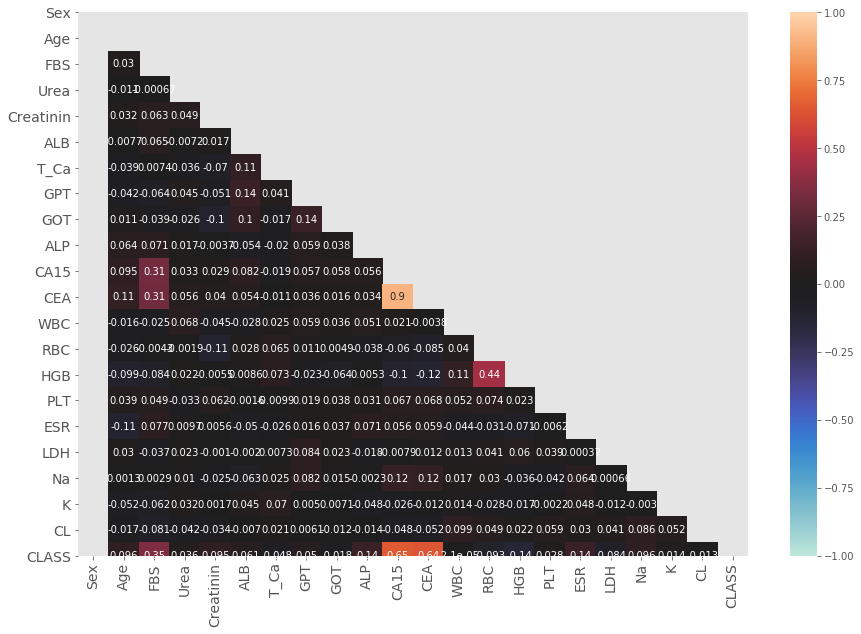

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(BC.corr(),mask=mask,annot=True,center=0, vmin=-1,
    vmax=1)

BC.corr()

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



## The best 10 features by Correlation Analysis

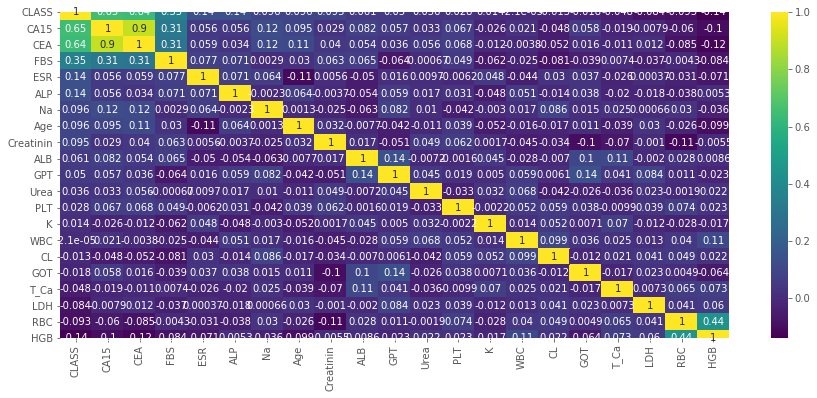

In [41]:
k = 21 #number of variables for heatmap
cols = BC.corr().nlargest(k, 'CLASS')['CLASS'].index
cm = BC[cols].corr()
plt.figure(figsize=(15,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## Outier investigation

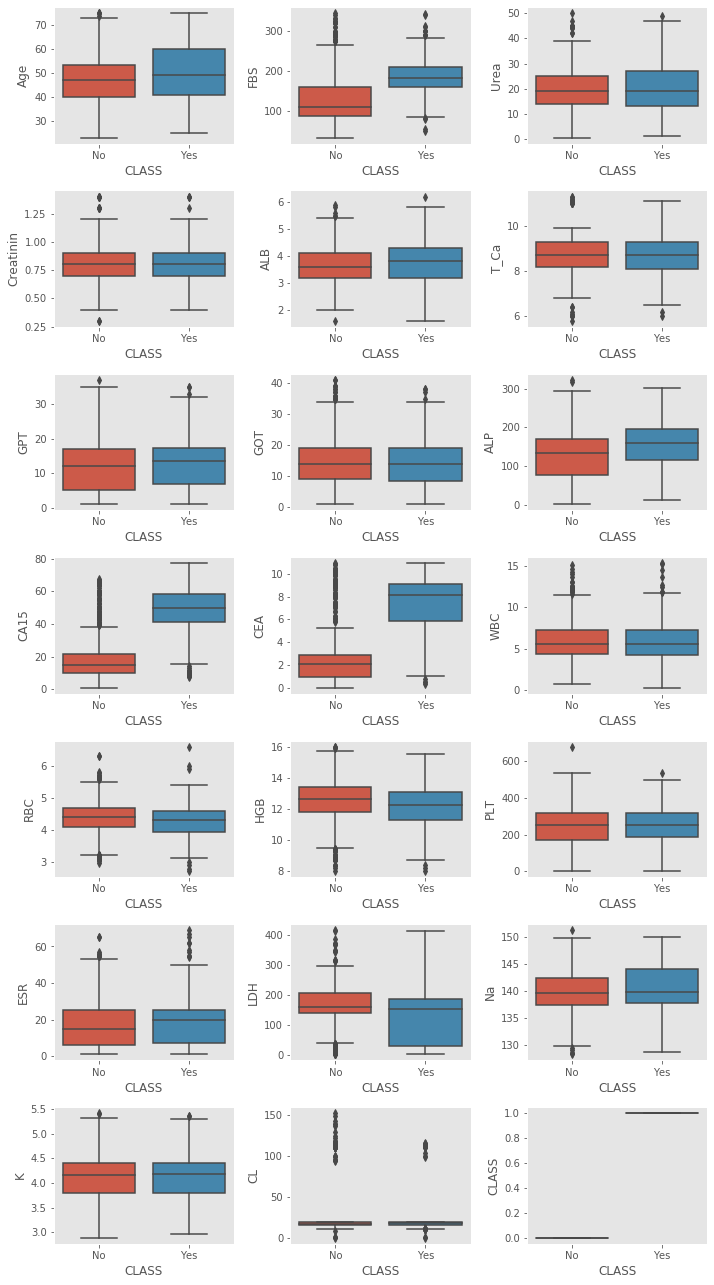

In [42]:
temp = BC[['Age','FBS','Urea','Creatinin','ALB','T_Ca','GPT','GOT','ALP','CA15','CEA',
                'WBC','RBC','HGB','PLT','ESR','LDH','Na','K','CL','CLASS']]
plt.figure(figsize=(10,20))
for i in range(21):
    plt.subplot(8,3,i+1)# لان عدد الخصائص المطلوبه 24 عنصر نقسمها
    plt.grid( False )
    sns.boxplot(x='CLASS', y=temp.columns[ i ], data=temp)
    plt.xticks([0,1],['No','Yes'], rotation=0 )
plt.tight_layout( True )
plt.show()

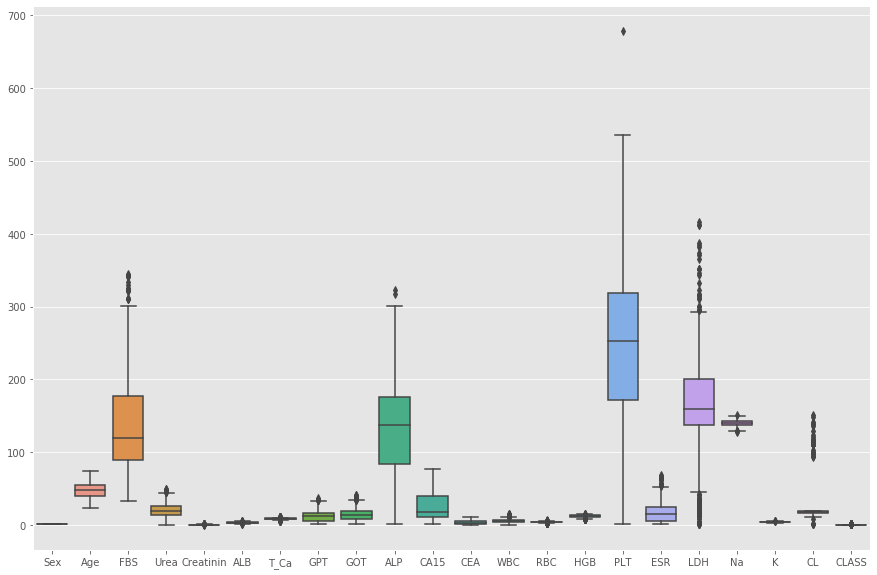

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BC)


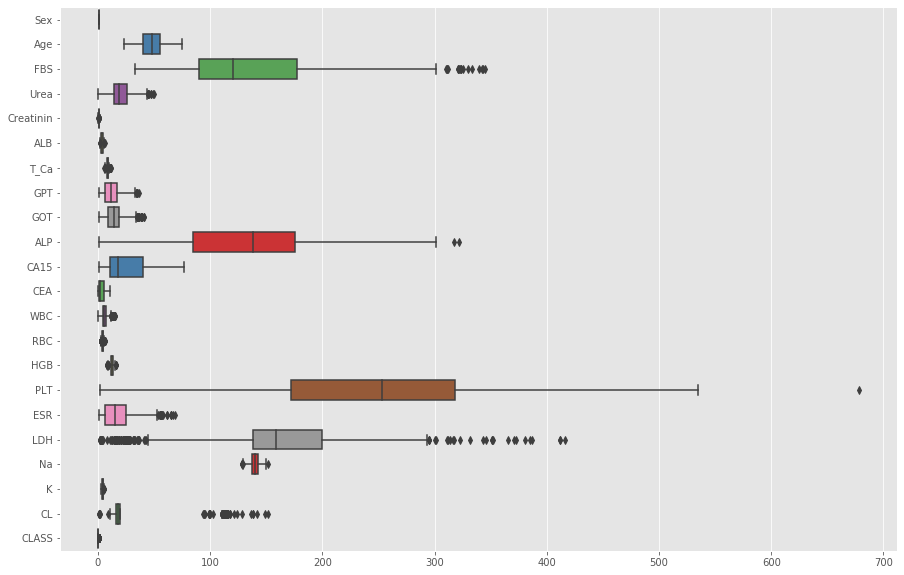

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BC,orient="h", palette="Set1")


## Let's now investigate more closely the distributions of these features separately for the two classes using Crosstabs:

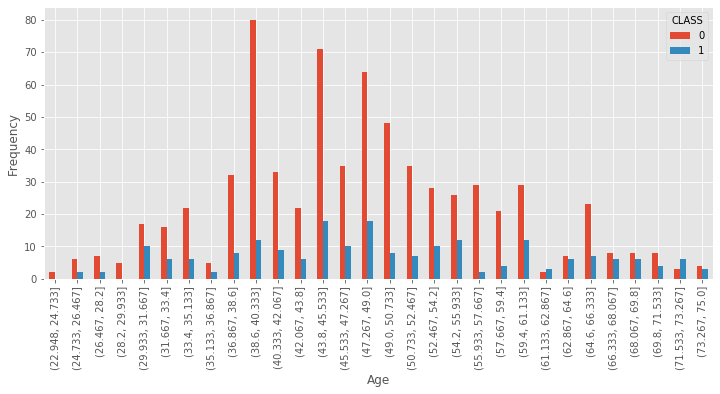

In [45]:
p.crosstab( p.cut(BC.Age,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

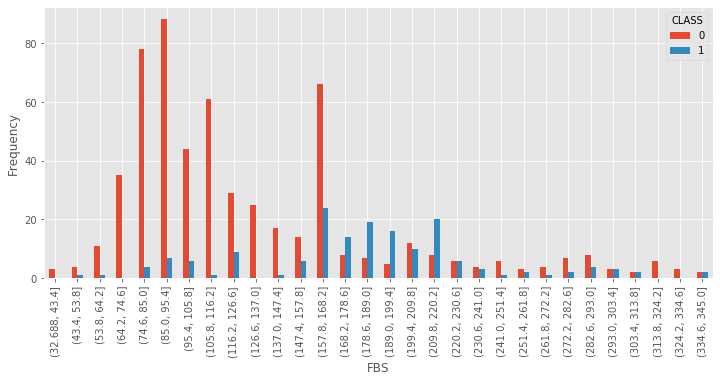

In [46]:
p.crosstab( p.cut(BC.FBS,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

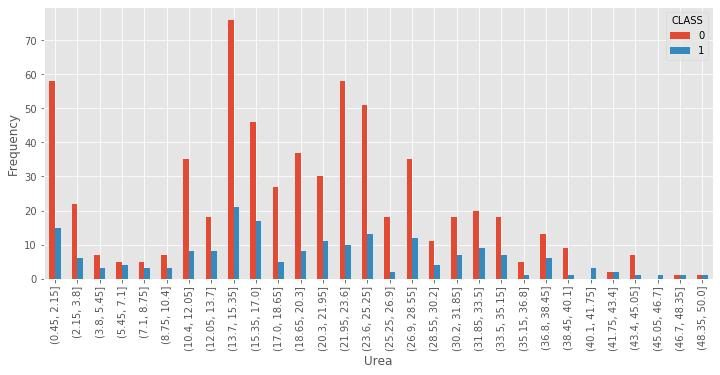

In [47]:
p.crosstab( p.cut(BC.Urea,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

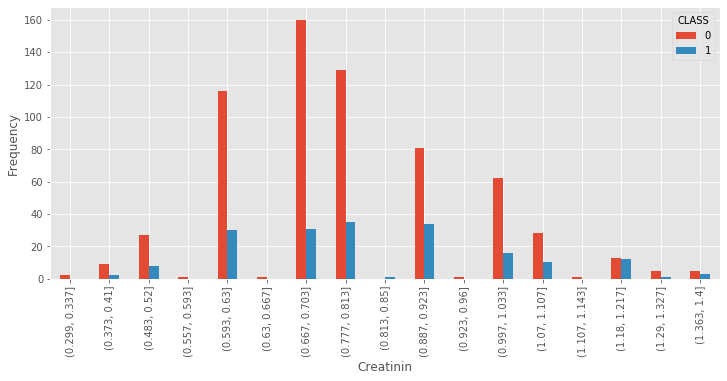

In [48]:
p.crosstab( p.cut(BC.Creatinin,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

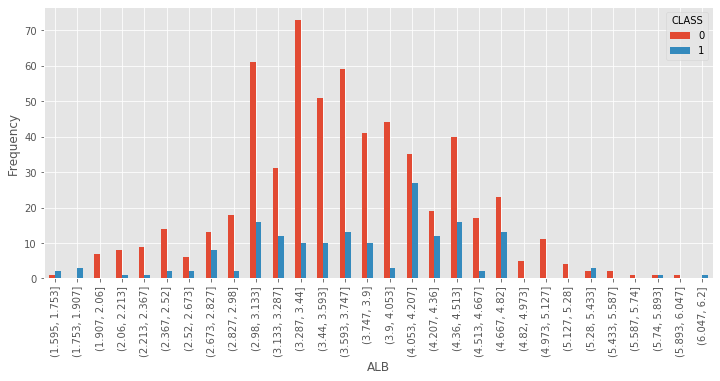

In [49]:
p.crosstab( p.cut(BC.ALB,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

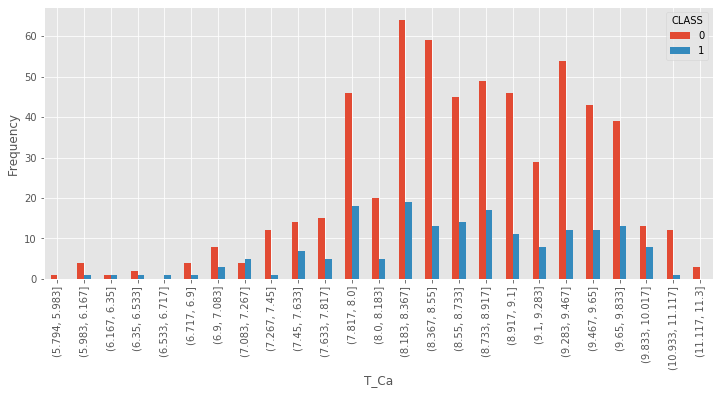

In [50]:
p.crosstab( p.cut(BC.T_Ca,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

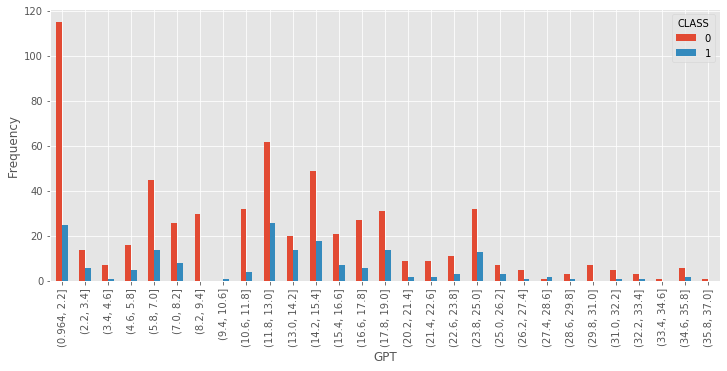

In [51]:
p.crosstab( p.cut(BC.GPT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

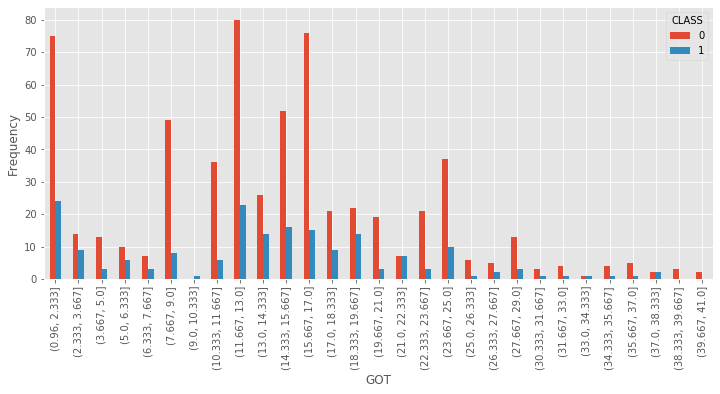

In [52]:
p.crosstab( p.cut(BC.GOT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

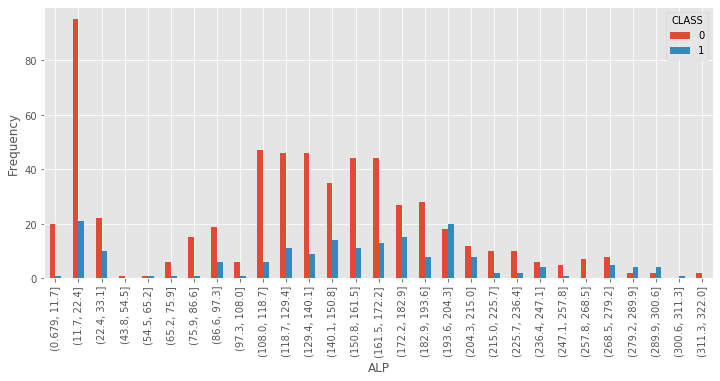

In [53]:
p.crosstab( p.cut(BC.ALP,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

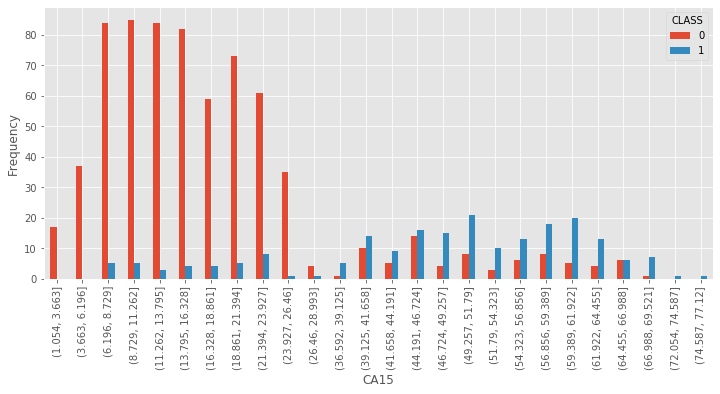

In [54]:
CA=BC['CA15']
p.crosstab( p.cut(CA,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

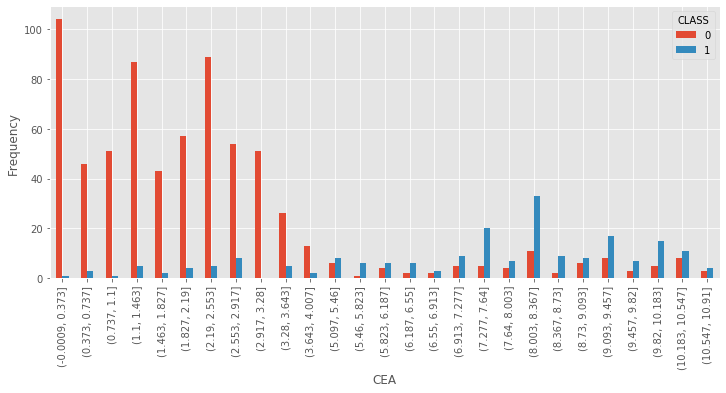

In [55]:
p.crosstab( p.cut(BC.CEA,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

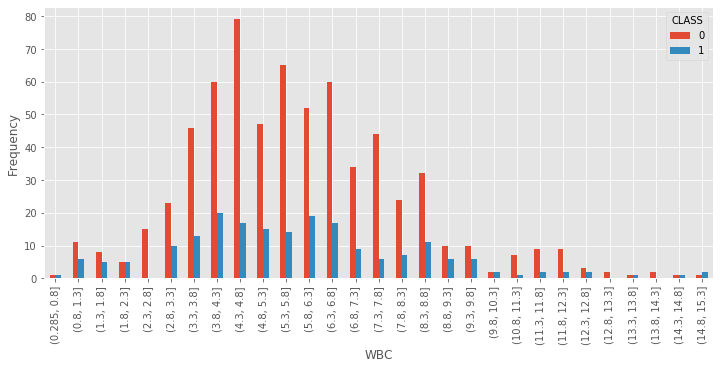

In [56]:
p.crosstab( p.cut(BC.WBC,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

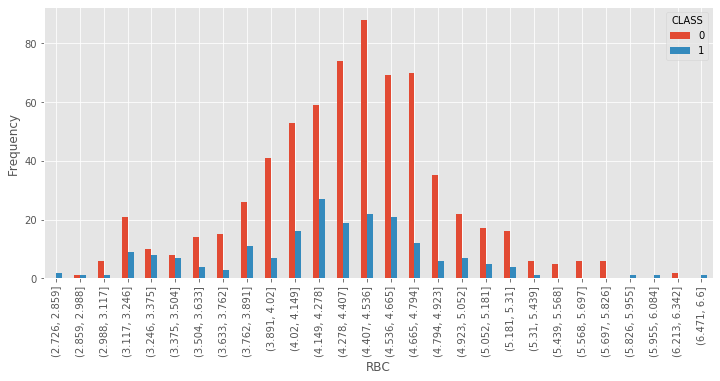

In [57]:
p.crosstab( p.cut(BC.RBC,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

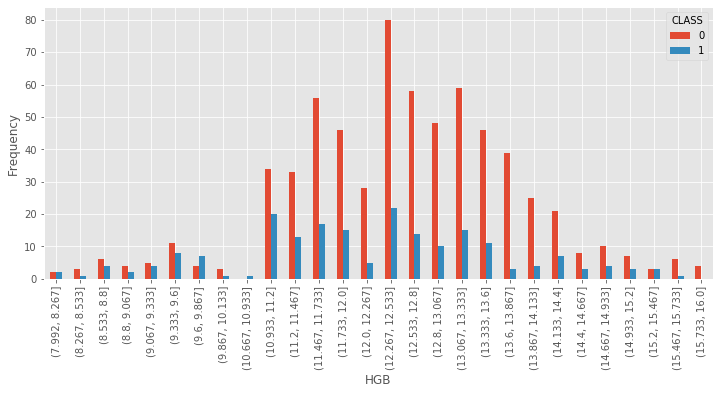

In [58]:
p.crosstab( p.cut(BC.HGB,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

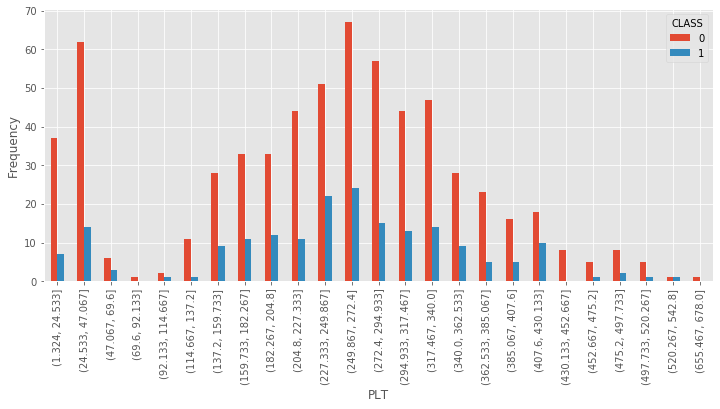

In [59]:
p.crosstab( p.cut(BC.PLT,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

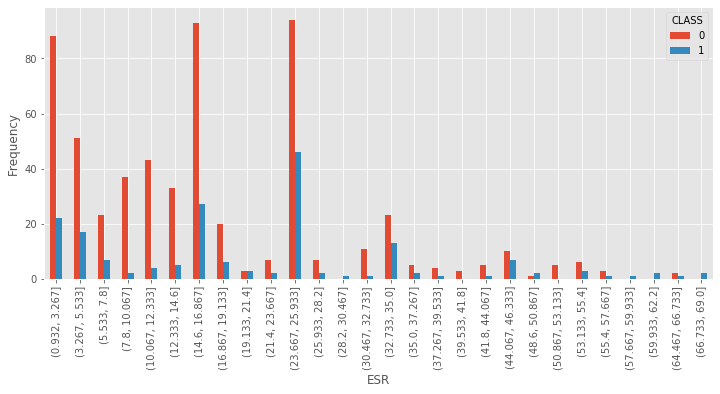

In [60]:
p.crosstab( p.cut(BC.ESR,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

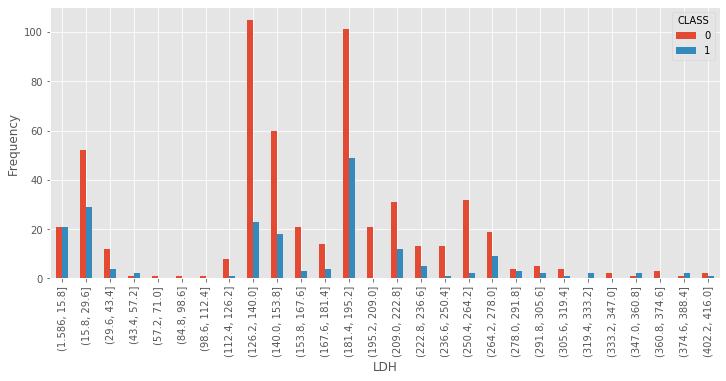

In [61]:
p.crosstab( p.cut(BC.LDH,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

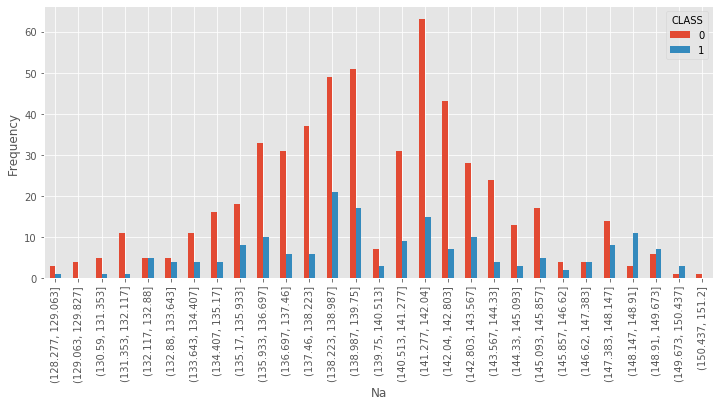

In [62]:
p.crosstab( p.cut(BC.Na,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

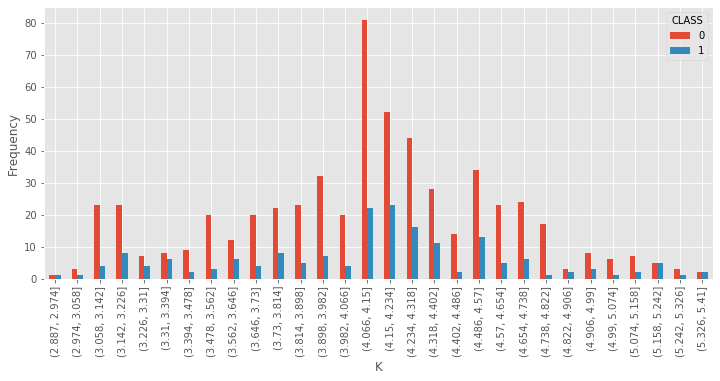

In [63]:
p.crosstab( p.cut(BC.K,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

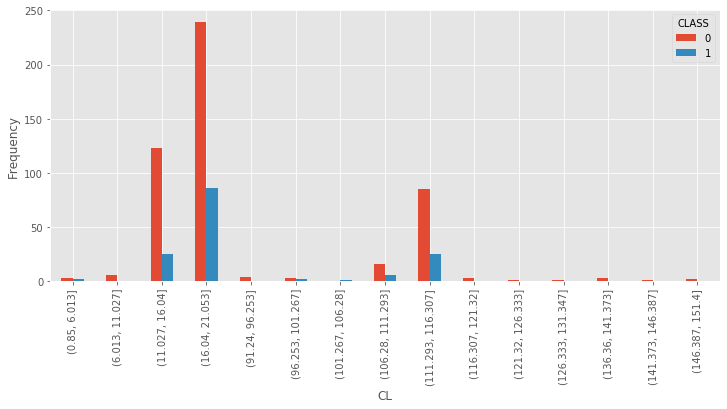

In [64]:
p.crosstab( p.cut(BC.CL,bins=30),BC.CLASS).plot(kind='bar',figsize=(12,5))
plt.ylabel("Frequency")
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = BC.columns.tolist()
for column in cols:
    if BC[column].dtype == 'object':
        BC[column] = le.fit_transform(BC[column])


C:\Users\TOSHIBA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
BC["FBS"].fillna(BC["FBS"].mean(), inplace=True)
BC["Urea"].fillna(BC["Urea"].mean(), inplace=True)
BC["Creatinin"].fillna(BC["Creatinin"].mean(), inplace=True)
BC["ALB"].fillna(BC["ALB"].mean(), inplace=True)
BC["T_Ca"].fillna(BC["T_Ca"].mean(), inplace=True)
BC["GPT"].fillna(BC["GPT"].mean(), inplace=True)
BC["GOT"].fillna(BC["GOT"].mean(), inplace=True)
BC["ALP"].fillna(BC["ALP"].mean(), inplace=True)
BC["WBC"].fillna(BC["WBC"].mean(), inplace=True)
BC["HGB"].fillna(BC["HGB"].mean(), inplace=True)
BC["RBC"].fillna(BC["RBC"].mean(), inplace=True)
BC["PLT"].fillna(BC["PLT"].mean(), inplace=True)
BC["ESR"].fillna(BC["ESR"].mean(), inplace=True)
BC["LDH"].fillna(BC["LDH"].mean(), inplace=True)
BC["Na"].fillna(BC["Na"].mean(), inplace=True)
BC["K"].fillna(BC["K"].mean(), inplace=True)
BC["CL"].fillna(BC["CL"].mean(), inplace=True)
BC["CA15"].fillna(BC["CA15"].mean(), inplace=True)
BC["CEA"].fillna(BC["CEA"].mean(), inplace=True)
BC

C:\Users\TOSHIBA\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Sex  Age  Adress    FBS  Urea  Creatinin  ALB  T_Ca        GPT  \
6       1   40      12  245.0  32.0        1.2  3.5   7.4  12.347871   
12      1   48      12  250.0  24.0        0.7  2.9   8.4  11.000000   
14      1   50      12  289.0  16.0        1.0  4.1   9.1  15.000000   
15      1   38      12  298.0  23.0        0.8  2.9   8.2   1.000000   
16      1   47      12  190.0  23.0        1.1  5.2   8.5   9.000000   
...   ...  ...     ...    ...   ...        ...  ...   ...        ...   
2319    1   65      10   98.0  33.0        1.4  1.8   8.8  11.000000   
2321    1   61      10   95.0  38.0        1.0  4.3   9.0  17.000000   
2322    1   65      10  160.0  41.0        0.8  4.7   7.8  15.000000   
2332    1   49      19  120.0  23.0        0.8  4.2  10.0  10.000000   
2403    1   57      14  120.0  28.0        0.9  4.4   7.8   4.000000   

            GOT  ...  WBC   RBC   HGB    PLT   ESR         LDH     Na     K  \
6     14.282125  ...  8.4  4.23  11.1  392.0  46.0  157.002013  142.1  4.23   
12    11.000000  ...  9.6  4.67  13.0  492.0   5.0  185.000000  141.0  4.59   
14    21.000000  ...  9.0  4.40  12.5  200.0  15.0  200.000000  139.3  4.39   
15    17.000000  ...  8.4  4.30  13.0  191.0  25.0  232.000000  142.7  4.61   
16    13.000000  ...  9.1  4.54  12.0  400.0  25.0  250.000000  143.0  4.70   
...         ...  ...  ...   ...   ...    ...   ...         ...    ...   ...   
2319  12.000000  ...  8.3  3.81  13.5  278.0  15.0  217.000000  132.8  4.39   
2321  22.000000  ...  8.4  4.75  12.1  137.0  11.0  132.000000  131.3  4.33   
2322  23.000000  ...  9.9  4.11  12.4  148.0  12.0  185.000000  143.7  5.20   
2332  10.000000  ...  3.4  4.60  13.4  196.0  14.0   11.000000  142.3  4.50   
2403   9.000000  ...  5.4  4.12  10.7  150.0  15.0  139.000000  142.3  4.29   

              CL  CLASS  
6      19.100000      0  
12     39.512716      0  
14     18.000000      0  
15     19.800000      0  
16     11.000000      0  
...          ...    ...  
2319   19.500000      1  
2321   18.200000      1  
2322   11.300000      1  
2332  103.000000      1  
2403  100.000000      1  

[901 rows x 23 columns]

In [67]:
X=BC.drop(["CLASS"],axis=1)
y=BC["CLASS"]  

In [68]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=0) 


In [69]:
## قبل الضبط البارميترات

from sklearn.tree import DecisionTreeClassifier

D_classifier= DecisionTreeClassifier(random_state=0) 
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [70]:
y_pred=D_classifier.predict_proba(X_test)[:,1]
new_y=[]
for i in range (len(y_pred)):
    if y_pred[i]<0.5:
        new_y.append(0)
    else:
        new_y.append(1)

In [71]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test,new_y)


0.8893805309734514

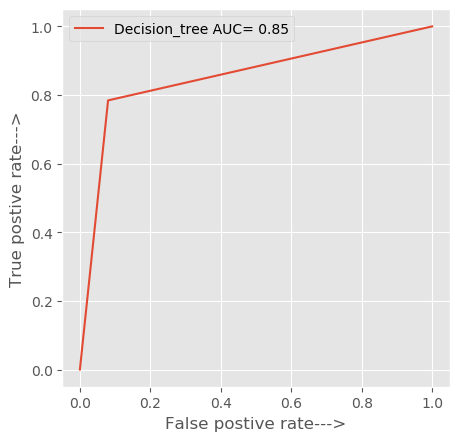

In [72]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,new_y)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(dec_fpr,dec_tpr,linestyle='-',label='Decision_tree AUC=% 0.2f' % auc_dec)

plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


In [73]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,new_y,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,new_y,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)

mean_absolute_error is = 0.11061946902654868
mean_squared_error is = 0.3325950526188697


Decision Tree  classifiers  confusion_matrix
Decision Tree classifier Trining Accurcy = 1.0
Decision Tree classifier Testing Accurcy =  0.8893805309734514
[[161  14]
 [ 11  40]]


Text(69.0, 0.5, 'Acutl')

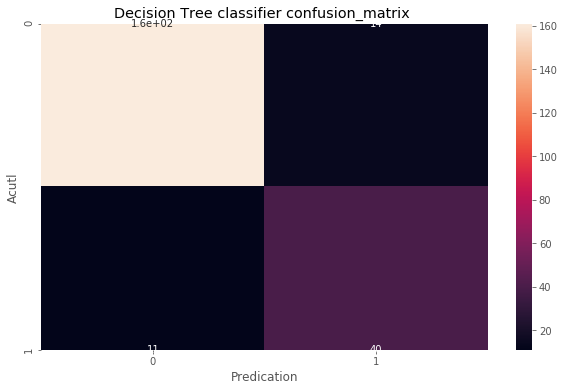

In [74]:
from sklearn.metrics import confusion_matrix

print("Decision Tree  classifiers  confusion_matrix")
cm=confusion_matrix(y_test,new_y)
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print('Decision Tree classifier Trining Accurcy =',D_classifier.score(X_train,y_train) )
print('Decision Tree classifier Testing Accurcy = ',(TP+TN)/(TP+TN+FP+FN))
print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("Decision Tree classifier confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

In [75]:
### CLASSIFACTION Report

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report Decision Tree')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report Decision Tree
.......................................
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       175
           1       0.74      0.78      0.76        51

    accuracy                           0.89       226
   macro avg       0.84      0.85      0.84       226
weighted avg       0.89      0.89      0.89       226

accuracy_score= 0.8893805309734514
